# YOLOv8

This notebook details how the YOLOv8 model was trained 4-folds, benchmarked and evaluated

install necessary libraries

In [ ]:
from pathlib import Path
from ultralytics import YOLO
import shutil
import os
import torch
from ultralytics.utils.benchmarks import benchmark
import torch
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, f1_score
import time
from google.colab import drive
from google.colab import runtime

Mount google drive to access data stored.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


install Ultralytics framework

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

initialise yolov3 model

In [ ]:
# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch

Define paths for the k-fold data

In [ ]:
# Hardcoded values
ds_yamls = [
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/split_1_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/split_2_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/split_3_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/split_4_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml')
]

Define number of k-fold splits

In [ ]:
ksplit = 3

training model for 3-folds with early stopping

In [ ]:
results = {}

# Define your additional arguments here
batch = 16
project = "kfold"
epochs = 100
# Define early stopping parameters
early_stopping_params = {
    'patience': 10,  # Number of epochs to wait after last improvement
}

for k in range(ksplit):
    dataset_yaml = ds_yamls[k]
    model.train(data=dataset_yaml, patience=early_stopping_params['patience'], epochs=epochs, batch=batch, project=project)  # include any train arguments
    results[k] = model.metrics  # save output metrics for further analysis

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/split_1_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 341MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/labels.cache... 1620 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1620/1620 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/val/labels.cache... 406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<?, ?it/s]


Plotting labels to kfold/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/102 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      2.24G      3.041       2.95      3.798         34        640: 100%|██████████| 102/102 [01:42<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:27<00:00,  2.11s/it]

                   all        406       1730     0.0553     0.0954     0.0256    0.00985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.14G      2.008      1.872      2.539         38        640: 100%|██████████| 102/102 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.30it/s]


                   all        406       1730      0.802      0.649      0.702      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G      1.496      1.376      1.978         53        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.943      0.704      0.776      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.2G      1.306      1.164      1.752         29        640: 100%|██████████| 102/102 [00:16<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.934      0.702      0.766      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.14G      1.108      1.016      1.571         46        640: 100%|██████████| 102/102 [00:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        406       1730      0.963      0.729       0.81      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.13G      1.042     0.9494      1.521         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        406       1730      0.954      0.733      0.797      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.21G     0.9925     0.9154      1.472         46        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]

                   all        406       1730      0.953      0.738      0.835      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.21G     0.9164     0.8124        1.4         28        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        406       1730      0.952      0.727      0.774      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.16G     0.8945     0.8163      1.383         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.30it/s]

                   all        406       1730      0.949      0.746      0.837      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.22G     0.8424     0.7549      1.329         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        406       1730      0.968      0.746      0.836      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.14G     0.8202     0.7388      1.318         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        406       1730      0.957      0.755      0.845      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.14G     0.7924     0.6952      1.286         53        640: 100%|██████████| 102/102 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        406       1730      0.954       0.77      0.855      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.15G     0.8117     0.7356       1.31         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all        406       1730       0.96      0.771      0.857      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.2G     0.7886     0.7141      1.287         42        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        406       1730      0.956      0.772      0.857      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.15G       0.77     0.6879      1.278         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        406       1730      0.975      0.761      0.859      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.13G     0.7427     0.6494      1.244         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        406       1730       0.97      0.766      0.862      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.14G     0.7395     0.6531      1.249         41        640: 100%|██████████| 102/102 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.35it/s]

                   all        406       1730       0.97      0.779      0.872      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.13G      0.746     0.6567      1.255         53        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        406       1730      0.973      0.786      0.868      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.13G     0.7034     0.6127      1.212         39        640: 100%|██████████| 102/102 [00:14<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        406       1730       0.97      0.767      0.861      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.15G     0.6959     0.6065      1.222         42        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]

                   all        406       1730      0.981      0.753      0.864      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.15G     0.6814     0.6011      1.205         43        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        406       1730      0.978      0.768      0.866      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.14G     0.6642     0.5753      1.181         39        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        406       1730      0.981      0.778      0.868      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.15G     0.6867     0.6032      1.209         41        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]

                   all        406       1730      0.966      0.803       0.88      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.21G     0.6667     0.5884      1.189         39        640: 100%|██████████| 102/102 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        406       1730       0.97      0.785      0.873      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.13G     0.6759     0.5925      1.199         32        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        406       1730      0.976      0.791      0.877      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.13G      0.653     0.5897      1.182         51        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        406       1730      0.901      0.788      0.872       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.14G     0.6336     0.5433      1.163         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.964      0.799      0.884      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.13G     0.6244     0.5281      1.155         48        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]

                   all        406       1730      0.973      0.797      0.881      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.13G     0.6077     0.5298      1.143         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        406       1730      0.958      0.782      0.874      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.13G     0.6194      0.544      1.153         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        406       1730      0.963      0.804      0.885      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.14G     0.6268     0.5565      1.163         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.978      0.801      0.885      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.15G      0.611     0.5359      1.154         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        406       1730      0.975      0.816      0.893      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.2G     0.6045     0.5364      1.153         40        640: 100%|██████████| 102/102 [00:16<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all        406       1730      0.957      0.805      0.883      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.2G     0.5923     0.5154      1.134         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        406       1730      0.978      0.808      0.895      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.13G     0.5971     0.5206      1.138         36        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        406       1730      0.969      0.801       0.89      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.15G     0.6142      0.528      1.148         43        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]

                   all        406       1730      0.969       0.82      0.902       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.14G     0.5902     0.5126      1.127         38        640: 100%|██████████| 102/102 [00:16<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.85it/s]

                   all        406       1730      0.966      0.813      0.891      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.21G      0.585     0.4965      1.118         43        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]

                   all        406       1730      0.973       0.82      0.896      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.23G     0.5945     0.5107      1.136         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        406       1730      0.976      0.817        0.9      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.15G     0.6051     0.5393      1.155         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.973      0.805      0.889      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.14G      0.564     0.4844      1.116         44        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all        406       1730       0.97      0.814      0.896      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.14G      0.555     0.4899      1.105         28        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]


                   all        406       1730      0.969      0.814        0.9      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.2G     0.5677     0.4874      1.117         34        640: 100%|██████████| 102/102 [00:14<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        406       1730       0.97      0.818      0.901      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.13G     0.5538     0.4792      1.102         38        640: 100%|██████████| 102/102 [00:16<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        406       1730      0.979      0.809      0.906      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.14G     0.5788     0.5003      1.124         39        640: 100%|██████████| 102/102 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        406       1730       0.97      0.814      0.894      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.13G     0.5517     0.4678      1.095         28        640: 100%|██████████| 102/102 [00:16<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.93it/s]

                   all        406       1730      0.969       0.82      0.904      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.15G     0.5562     0.4783      1.102         20        640: 100%|██████████| 102/102 [00:16<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        406       1730      0.963      0.823      0.904      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.14G     0.5549     0.4855      1.111         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        406       1730      0.979       0.81      0.904      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.14G     0.5581     0.4905      1.109         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        406       1730      0.977      0.817      0.905      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.15G      0.542     0.4703      1.102         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        406       1730      0.973      0.827      0.912      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.22G     0.5416     0.4715      1.094         37        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        406       1730      0.977      0.823       0.91       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.13G     0.5416     0.4703      1.096         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]

                   all        406       1730      0.972      0.836      0.913      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.13G     0.5285     0.4504      1.081         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]

                   all        406       1730      0.974       0.82      0.906      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.2G     0.5271     0.4475      1.084         41        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        406       1730      0.986      0.821      0.914      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.13G     0.5487     0.4671      1.099         37        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        406       1730      0.978      0.825      0.911      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.15G     0.5111     0.4415       1.07         22        640: 100%|██████████| 102/102 [00:16<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        406       1730      0.979      0.824      0.913      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.15G     0.5242     0.4487       1.08         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.89it/s]

                   all        406       1730      0.987      0.829      0.914      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.13G     0.5333     0.4606       1.09         42        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.68it/s]

                   all        406       1730      0.975      0.826       0.91      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.15G     0.5155     0.4324      1.067         39        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all        406       1730      0.981      0.832      0.915      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.14G     0.5172     0.4461      1.077         53        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        406       1730      0.977      0.821      0.913      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.16G     0.5015     0.4185      1.056         46        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        406       1730      0.968      0.839      0.917      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.14G     0.5051      0.425      1.065         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        406       1730      0.961       0.83      0.906       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.16G     0.4863     0.4261      1.054         40        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.68it/s]

                   all        406       1730      0.976      0.826      0.917      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.13G     0.4935     0.4125      1.054         41        640: 100%|██████████| 102/102 [00:15<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all        406       1730      0.988      0.834      0.915      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.14G     0.5124     0.4458      1.074         42        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        406       1730      0.988      0.829       0.92      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.15G     0.5038     0.4347       1.07         36        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        406       1730      0.984      0.825      0.917      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.13G     0.4975     0.4291      1.067         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all        406       1730      0.989      0.836       0.92      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.14G      0.499     0.4174      1.058         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        406       1730      0.965      0.824      0.913      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.14G     0.4938     0.4234      1.057         52        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.87it/s]

                   all        406       1730      0.984      0.835      0.921      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.13G     0.5002     0.4257      1.066         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        406       1730      0.984       0.83       0.92       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.14G     0.4892     0.4139      1.054         38        640: 100%|██████████| 102/102 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        406       1730      0.973      0.832      0.918      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.15G      0.502     0.4315       1.07         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        406       1730      0.987       0.83      0.922      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.13G     0.4835     0.4107      1.054         31        640: 100%|██████████| 102/102 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        406       1730      0.972      0.835      0.924      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.14G     0.4713     0.3889       1.04         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]

                   all        406       1730      0.969      0.838      0.922      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.15G     0.4868      0.411      1.057         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all        406       1730      0.969      0.831      0.916      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.13G      0.466     0.3853      1.039         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        406       1730      0.988      0.829      0.923      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.16G     0.4904     0.4128      1.059         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        406       1730      0.976      0.834      0.917      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.13G     0.4708      0.397      1.048         35        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all        406       1730      0.974      0.836       0.92      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.15G     0.4902     0.4185      1.058         38        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        406       1730      0.978      0.836      0.919      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G     0.4789     0.3986      1.046         33        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        406       1730      0.986      0.832      0.924      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.13G     0.4494       0.37       1.02         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        406       1730      0.981      0.835      0.922      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.13G     0.4578     0.3791      1.037         35        640: 100%|██████████| 102/102 [00:15<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        406       1730      0.971      0.836      0.922      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.13G     0.4562     0.3862       1.03         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        406       1730      0.987      0.838      0.924       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.14G     0.4544     0.3842      1.033         46        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        406       1730      0.978      0.838      0.924      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.13G     0.4714     0.3953      1.042         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.85it/s]

                   all        406       1730      0.972      0.834      0.925      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.2G     0.4537     0.3829      1.033         38        640: 100%|██████████| 102/102 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        406       1730       0.97      0.833      0.922      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.15G      0.453     0.3789      1.026         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.89it/s]

                   all        406       1730      0.969      0.839      0.924      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.14G     0.4586     0.3825      1.033         33        640: 100%|██████████| 102/102 [00:16<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.11it/s]

                   all        406       1730      0.973       0.84      0.927       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.15G     0.4541     0.3823      1.035         34        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        406       1730      0.984      0.837      0.928      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.13G     0.4592     0.3811      1.033         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        406       1730      0.972      0.832       0.92       0.85


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.14G     0.4153     0.3527     0.9952         15        640: 100%|██████████| 102/102 [00:18<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        406       1730      0.976      0.834      0.922      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.13G     0.4031       0.34      0.989         15        640: 100%|██████████| 102/102 [00:14<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        406       1730      0.966      0.839      0.925      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.14G     0.3981       0.33     0.9833         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        406       1730      0.976      0.835      0.929      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.13G     0.3944      0.332     0.9857         16        640: 100%|██████████| 102/102 [00:14<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        406       1730      0.966      0.843      0.931      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.14G     0.3882     0.3193     0.9719         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        406       1730       0.97      0.842      0.928      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.13G     0.3925     0.3224     0.9843         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        406       1730      0.977      0.835       0.93      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.14G     0.3887      0.326     0.9838         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        406       1730      0.975      0.838      0.929      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.13G     0.3839     0.3168      0.979         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        406       1730      0.978       0.84      0.931      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.14G     0.3777     0.3066      0.971         16        640: 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        406       1730      0.973      0.843      0.931      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.13G     0.3812     0.3174      0.973         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        406       1730       0.99      0.836      0.933      0.859



100 epochs completed in 0.551 hours.
Optimizer stripped from kfold/train/weights/last.pt, 6.2MB
Optimizer stripped from kfold/train/weights/best.pt, 6.2MB

Validating kfold/train/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


                   all        406       1730      0.989      0.836      0.933      0.858
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to kfold/train
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/split_2_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, pl

train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/labels.cache... 1621 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/val/labels.cache... 405 images, 1 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]


Plotting labels to kfold/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.24G      2.917      3.148      3.867         11        640: 100%|██████████| 102/102 [01:30<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  54%|█████▍    | 7/13 [00:12<00:09,  1.54s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:29<00:00,  2.25s/it]

                   all        405       1693    0.00944      0.677     0.0904     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.26G      2.138      2.171      2.783         21        640: 100%|██████████| 102/102 [00:14<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1693      0.478      0.455       0.37      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.16G      1.646      1.582      2.264         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1693      0.858      0.675      0.758      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.14G      1.378      1.283      1.982         28        640: 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.31it/s]

                   all        405       1693      0.917      0.714      0.792      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.26G      1.204      1.104      1.779         34        640: 100%|██████████| 102/102 [00:15<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1693      0.939      0.739      0.831      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.15G       1.11     0.9978      1.662         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        405       1693      0.954      0.743      0.832      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.26G       1.04     0.9532      1.593         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]

                   all        405       1693      0.956      0.746      0.831      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.15G     0.9624      0.905      1.525         10        640: 100%|██████████| 102/102 [00:14<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1693      0.956      0.753      0.838      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.26G      0.934     0.8551       1.49         17        640: 100%|██████████| 102/102 [00:14<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        405       1693       0.92      0.748      0.836      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.14G     0.9116      0.826      1.464         28        640: 100%|██████████| 102/102 [00:16<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        405       1693      0.932      0.768      0.859      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.26G     0.8517     0.7856      1.415         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1693      0.817      0.763      0.806      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.15G     0.8198     0.7546      1.383         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1693      0.954      0.789      0.879      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.26G     0.8025     0.7376      1.362         29        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        405       1693      0.944      0.767       0.85      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.15G     0.7968       0.72      1.355         19        640: 100%|██████████| 102/102 [00:16<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.10it/s]

                   all        405       1693      0.954      0.802      0.881      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G     0.7735     0.6926      1.323         15        640: 100%|██████████| 102/102 [00:14<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        405       1693      0.962      0.781       0.87      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.15G     0.7516     0.6787      1.313         13        640: 100%|██████████| 102/102 [00:14<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        405       1693      0.965      0.787      0.881      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.26G     0.7517     0.6794      1.302         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1693      0.968      0.775      0.872      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.15G     0.7248      0.664      1.287         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1693      0.962      0.793      0.882      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.26G     0.6991     0.6363      1.257         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        405       1693      0.958      0.805      0.892      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.15G     0.7051     0.6331      1.267         10        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1693       0.95      0.809      0.899       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.26G     0.6899     0.6222      1.255         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1693      0.952      0.761      0.844      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.14G     0.6833     0.6085       1.25         27        640: 100%|██████████| 102/102 [00:16<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1693      0.946      0.816      0.895      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G     0.6778     0.6148      1.241         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.25it/s]

                   all        405       1693      0.969      0.795      0.888      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.14G     0.6701     0.6063       1.23         35        640: 100%|██████████| 102/102 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1693      0.963      0.816      0.899      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.26G     0.6585     0.5977      1.218         16        640: 100%|██████████| 102/102 [00:16<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        405       1693      0.954      0.811      0.895       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.15G     0.6611     0.5908      1.222         25        640: 100%|██████████| 102/102 [00:14<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]

                   all        405       1693      0.942      0.802      0.891      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.26G     0.6342     0.5622      1.195         15        640: 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        405       1693      0.962      0.817      0.901      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.14G     0.6378     0.5715      1.199         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]

                   all        405       1693      0.972      0.814      0.903      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.26G     0.6145     0.5621      1.193         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1693      0.957      0.818      0.908      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.15G     0.6265     0.5468      1.189         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        405       1693       0.95      0.833      0.894      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.26G     0.6107     0.5425      1.176         28        640: 100%|██████████| 102/102 [00:14<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        405       1693      0.958      0.836      0.911       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.15G     0.6154     0.5412       1.18         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1693      0.962      0.802      0.901       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.26G     0.5994      0.539      1.166         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1693      0.954      0.838      0.911      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.14G     0.5875     0.5203      1.161         33        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1693       0.97      0.823      0.909      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.26G     0.5882     0.5224      1.164         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        405       1693      0.958      0.828      0.906      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.15G     0.5781     0.5154      1.152         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1693      0.953      0.835      0.911      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.26G     0.5927      0.515      1.162         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1693      0.971      0.812      0.909      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.14G     0.5735     0.5075      1.151         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.44it/s]

                   all        405       1693      0.974      0.812      0.909      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.26G      0.566     0.4995       1.14         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1693      0.972      0.823      0.912      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.15G     0.5688     0.5065      1.146         18        640: 100%|██████████| 102/102 [00:16<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1693      0.972      0.835      0.919      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.26G      0.561     0.4916      1.126         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1693      0.971      0.829      0.916       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.15G     0.5506     0.4917      1.124         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1693      0.973      0.823      0.914      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.26G     0.5489     0.4826      1.128         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1693      0.966      0.845      0.922      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.14G     0.5447     0.4774      1.123         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        405       1693      0.959      0.838       0.92      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.26G     0.5428      0.479      1.122         20        640: 100%|██████████| 102/102 [00:14<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1693      0.961      0.838      0.919      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.15G      0.542     0.4825      1.124         22        640: 100%|██████████| 102/102 [00:14<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1693      0.974      0.828      0.921      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.26G     0.5355     0.4751      1.118         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1693      0.974       0.84      0.924       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.15G      0.533     0.4743       1.11         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]

                   all        405       1693      0.956      0.847      0.924      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.26G     0.5347     0.4693      1.111         24        640: 100%|██████████| 102/102 [00:14<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        405       1693       0.96      0.854      0.929      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.15G      0.523     0.4597      1.104         12        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        405       1693      0.969      0.843      0.927      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.26G     0.5321      0.458      1.103         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]

                   all        405       1693      0.967      0.841      0.926       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.14G     0.5288     0.4587      1.105         28        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1693       0.97      0.854       0.93       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G     0.5234     0.4536      1.105         23        640: 100%|██████████| 102/102 [00:14<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        405       1693      0.967      0.827      0.923      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.14G     0.5202     0.4523      1.099         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all        405       1693      0.975       0.84       0.93      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.25G     0.5139     0.4405      1.103         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1693      0.963      0.842      0.923       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.15G     0.5154     0.4435      1.104         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.39it/s]

                   all        405       1693      0.964      0.855      0.934      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.26G     0.5084     0.4363       1.09         32        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.04it/s]

                   all        405       1693      0.975      0.828      0.927      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.14G     0.5105     0.4414      1.094         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]

                   all        405       1693      0.961      0.853      0.936      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.26G     0.5055     0.4397      1.088         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1693      0.976      0.848      0.934      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.15G     0.4991     0.4367      1.084         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all        405       1693       0.96      0.857      0.927      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.26G     0.4937     0.4244      1.079         20        640: 100%|██████████| 102/102 [00:14<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        405       1693      0.971      0.856      0.933      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.15G     0.4891     0.4233      1.076         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all        405       1693      0.965       0.86      0.936      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G     0.4829     0.4141      1.069         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1693      0.963      0.857      0.934      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.15G      0.489     0.4191      1.075         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1693       0.98      0.849      0.933      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.26G     0.4803     0.4134       1.07         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]

                   all        405       1693      0.976      0.852      0.942      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.15G     0.4765     0.4069      1.064         17        640: 100%|██████████| 102/102 [00:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        405       1693      0.982      0.852      0.936      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G      0.465     0.3985      1.055         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.89it/s]

                   all        405       1693      0.981      0.851      0.937      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.14G     0.4713      0.406      1.064         28        640: 100%|██████████| 102/102 [00:14<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1693      0.971      0.863      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.26G     0.4733     0.4116      1.059         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1693      0.976      0.849      0.942      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.15G     0.4674     0.4017      1.057         18        640: 100%|██████████| 102/102 [00:16<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all        405       1693      0.972      0.856      0.937      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.26G      0.467     0.3935      1.058         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        405       1693      0.976      0.852      0.942      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.14G     0.4783     0.4164      1.071         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all        405       1693      0.971      0.858       0.94      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G     0.4644     0.3918      1.055         12        640: 100%|██████████| 102/102 [00:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.12it/s]

                   all        405       1693      0.978      0.857      0.941      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.15G     0.4499     0.3835      1.042         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]

                   all        405       1693      0.974      0.853      0.938      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.26G     0.4567     0.3827      1.045         10        640: 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1693      0.978      0.854      0.936      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.15G     0.4551     0.3875      1.044         20        640: 100%|██████████| 102/102 [00:14<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1693      0.974      0.861      0.943      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.26G     0.4482     0.3804      1.036         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]

                   all        405       1693      0.974      0.861      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.14G     0.4493     0.3826      1.042         35        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1693      0.973      0.845      0.939      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.4471     0.3803       1.04         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]

                   all        405       1693      0.983      0.855      0.946      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.15G     0.4386     0.3707      1.034         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1693      0.975      0.864      0.943      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.25G     0.4375     0.3723      1.035         24        640: 100%|██████████| 102/102 [00:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all        405       1693      0.977      0.858      0.945      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.15G     0.4415     0.3709      1.037         13        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        405       1693      0.974      0.868      0.951      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.26G     0.4332     0.3598      1.028         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1693      0.984      0.857      0.949      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.14G     0.4333      0.366      1.034         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        405       1693       0.98      0.859      0.949      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.26G     0.4342     0.3682       1.03         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        405       1693      0.972      0.869       0.95      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.15G     0.4234     0.3562      1.025         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1693      0.979      0.861       0.95      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G     0.4234     0.3541      1.025         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1693      0.978      0.861       0.95      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.14G     0.4251     0.3547      1.026         32        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]

                   all        405       1693      0.984      0.863      0.953      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.26G     0.4213     0.3509      1.022         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        405       1693      0.981      0.866       0.95      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.15G     0.4137     0.3409      1.018         17        640: 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1693      0.975      0.867      0.951      0.881


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.25G     0.4224     0.3469      1.021         34        640: 100%|██████████| 102/102 [00:18<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]

                   all        405       1693      0.981      0.865      0.952      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.14G     0.4104     0.3408      1.017         17        640: 100%|██████████| 102/102 [00:14<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        405       1693      0.982      0.859       0.95      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.26G      0.411     0.3355      1.014         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        405       1693      0.979      0.866       0.95      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.15G     0.4064     0.3353      1.011         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        405       1693      0.983      0.864      0.952      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.26G     0.4053     0.3331      1.013         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.88it/s]

                   all        405       1693      0.977       0.87      0.952      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.15G     0.4004     0.3325      1.004         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1693      0.979      0.867      0.954      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.25G      0.402     0.3318      1.003         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1693      0.969      0.872      0.953      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.14G     0.4025     0.3352      1.011         30        640: 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.47it/s]

                   all        405       1693       0.97      0.874      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.26G     0.3974      0.328      1.004         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1693      0.981      0.867      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.14G     0.3999     0.3298      1.012         25        640: 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.68it/s]

                   all        405       1693       0.98      0.868      0.953      0.886



100 epochs completed in 0.556 hours.
Optimizer stripped from kfold/train2/weights/last.pt, 6.2MB
Optimizer stripped from kfold/train2/weights/best.pt, 6.2MB

Validating kfold/train2/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]


                   all        405       1693       0.98      0.868      0.953      0.886
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to kfold/train2
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/split_3_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, 

train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/train/labels.cache... 1621 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/labels.cache... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


Plotting labels to kfold/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.24G      2.909      3.137      3.853         18        640: 100%|██████████| 102/102 [01:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:01,  5.54it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:27<00:00,  2.11s/it]

                   all        405       1684     0.0408      0.312     0.0601      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.16G      2.115      2.138      2.744         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.18it/s]


                   all        405       1684      0.717      0.662      0.678      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.26G       1.64      1.583      2.252         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        405       1684      0.871      0.717      0.786       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.25G      1.388      1.285      1.938         28        640: 100%|██████████| 102/102 [00:16<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        405       1684      0.925       0.75      0.831      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.16G      1.229      1.157      1.756         35        640: 100%|██████████| 102/102 [00:14<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1684      0.949       0.75      0.843      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.25G      1.092      1.029      1.614         13        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        405       1684      0.923      0.774      0.844      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.16G      1.032     0.9594      1.551         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1684      0.952      0.784       0.88      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.26G     0.9788     0.9119      1.506         17        640: 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1684      0.935       0.77      0.846      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.16G     0.9369     0.8665      1.463         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]

                   all        405       1684      0.968      0.769      0.892      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.25G     0.8865     0.8289      1.412         33        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1684      0.954      0.805      0.887      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.16G      0.857     0.7918      1.386         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1684      0.972      0.796       0.88      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.25G     0.8388     0.7691      1.376         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]

                   all        405       1684      0.959      0.805      0.882      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.16G     0.8262      0.765      1.349         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1684      0.886      0.808      0.877      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.25G     0.7956     0.7288      1.318         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all        405       1684      0.959      0.802      0.887      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.17G     0.7778     0.6982      1.299         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.55it/s]

                   all        405       1684       0.96       0.81      0.888      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.26G     0.7565     0.6983      1.289         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]

                   all        405       1684      0.967      0.798      0.867      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.17G     0.7643     0.6868       1.29         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1684      0.963      0.831      0.916      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.26G     0.7378     0.6682      1.273         13        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1684      0.949       0.83      0.909      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.16G     0.7143     0.6434      1.252         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        405       1684      0.954      0.839      0.915      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.26G     0.7181      0.639      1.246         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.36it/s]

                   all        405       1684      0.961      0.846      0.917      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.17G     0.7099     0.6374      1.247         16        640: 100%|██████████| 102/102 [00:14<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]

                   all        405       1684      0.975      0.825       0.91       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.25G     0.6848     0.6253      1.233         24        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1684      0.964      0.844      0.918      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.16G     0.6726     0.6121       1.22         13        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1684      0.974      0.844      0.924      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.25G     0.6668     0.6098      1.213         35        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1684      0.968      0.841      0.924      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.16G     0.6512      0.598      1.199         14        640: 100%|██████████| 102/102 [00:15<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        405       1684      0.971      0.845      0.925      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.26G     0.6426     0.5759      1.188         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1684      0.963      0.843      0.917      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.17G     0.6443     0.5799      1.185         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1684       0.96      0.848      0.912      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G     0.6391     0.5726      1.185         29        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1684      0.974       0.83      0.921       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.17G     0.6234     0.5571      1.171         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        405       1684      0.969      0.859      0.934      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.26G     0.6271     0.5495      1.167         25        640: 100%|██████████| 102/102 [00:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1684      0.906      0.831      0.902      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.16G     0.6123      0.544      1.159         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all        405       1684      0.966      0.856      0.932      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G     0.6013     0.5419      1.153         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1684      0.971      0.857      0.935       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.16G     0.6061     0.5499      1.153         23        640: 100%|██████████| 102/102 [00:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1684      0.971      0.843       0.92      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.25G     0.5994     0.5362      1.159         36        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1684      0.965      0.858      0.934      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.16G     0.5979     0.5304       1.15         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1684      0.972      0.858      0.936      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.26G      0.581     0.5165      1.132         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1684      0.972      0.846      0.933      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.16G     0.5843     0.5121      1.138         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]

                   all        405       1684       0.94      0.844      0.927      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.26G     0.5836     0.5114      1.138         13        640: 100%|██████████| 102/102 [00:16<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]

                   all        405       1684      0.975      0.865      0.929       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.17G     0.5736     0.5123      1.128         23        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        405       1684      0.974      0.859      0.938      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.26G     0.5613     0.5101      1.131         20        640: 100%|██████████| 102/102 [00:16<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.10it/s]

                   all        405       1684      0.968       0.87      0.941      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.16G     0.5701     0.4968      1.116         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1684      0.977      0.862      0.939      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.26G     0.5663     0.5044      1.118         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1684      0.966      0.872      0.942      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.17G     0.5565     0.4847      1.118         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        405       1684      0.972      0.872      0.942      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.25G     0.5469     0.4833      1.109         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all        405       1684      0.975      0.868      0.944      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.17G     0.5437     0.4823      1.108         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.93it/s]

                   all        405       1684      0.968       0.86      0.938      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.25G     0.5379     0.4739      1.098         15        640: 100%|██████████| 102/102 [00:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]

                   all        405       1684      0.978      0.863       0.94      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.16G     0.5494     0.4843      1.108         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]

                   all        405       1684      0.961      0.859      0.927       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.25G     0.5375     0.4693      1.094         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.87it/s]

                   all        405       1684      0.978      0.866      0.941      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.16G     0.5389     0.4693      1.093         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1684      0.974      0.869      0.939      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G     0.5257     0.4633      1.088         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all        405       1684      0.975      0.872      0.945      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.16G      0.527     0.4588      1.083         14        640: 100%|██████████| 102/102 [00:16<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.09it/s]

                   all        405       1684      0.977       0.87       0.94      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.25G     0.5348     0.4649      1.094         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        405       1684      0.978      0.868      0.945      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.17G      0.519     0.4538      1.083         28        640: 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1684      0.975      0.868      0.945      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.25G     0.5197      0.452      1.082         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1684      0.981      0.871       0.95      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.16G     0.5191     0.4491      1.078         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1684      0.975      0.874      0.947      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.25G     0.4962     0.4354      1.067         26        640: 100%|██████████| 102/102 [00:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1684      0.978      0.874      0.949      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.16G     0.5063     0.4357      1.069         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        405       1684       0.98      0.878      0.952      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.25G     0.5087     0.4468      1.079         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1684      0.978      0.871      0.948      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.16G     0.4954     0.4325      1.067         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1684       0.98      0.878       0.95      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.26G     0.4971     0.4283      1.062         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        405       1684      0.982      0.875      0.953      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.16G     0.4836     0.4179      1.052         15        640: 100%|██████████| 102/102 [00:15<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all        405       1684      0.983      0.873       0.95      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G     0.4846     0.4205      1.052         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1684       0.98      0.876      0.949      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.17G     0.4804     0.4161      1.051         27        640: 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.48it/s]

                   all        405       1684      0.981      0.875      0.951      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G      0.482     0.4136      1.056         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.96it/s]

                   all        405       1684      0.987      0.871      0.949      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.17G     0.4827     0.4127      1.056         22        640: 100%|██████████| 102/102 [00:16<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all        405       1684      0.983      0.871      0.949      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.25G     0.4783     0.4167       1.05         11        640: 100%|██████████| 102/102 [00:14<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]

                   all        405       1684      0.977       0.88      0.952      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.16G     0.4688     0.4042      1.038         11        640: 100%|██████████| 102/102 [00:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        405       1684      0.984      0.876      0.956      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.25G     0.4683     0.4062      1.041         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1684      0.975      0.883      0.951      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.16G     0.4735      0.406      1.045         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        405       1684      0.966      0.898      0.957      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.26G     0.4685     0.4016      1.045         21        640: 100%|██████████| 102/102 [00:16<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1684      0.974      0.883      0.956      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.17G     0.4628     0.3926      1.034         18        640: 100%|██████████| 102/102 [00:14<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]

                   all        405       1684      0.982      0.879      0.956      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.25G      0.471     0.4037      1.042         31        640: 100%|██████████| 102/102 [00:16<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        405       1684      0.975      0.886      0.954       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.16G     0.4604     0.3977      1.035         17        640: 100%|██████████| 102/102 [00:16<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1684      0.985      0.873      0.953      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.25G     0.4486     0.3839      1.031         10        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all        405       1684      0.962      0.894      0.957      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.17G     0.4571     0.3811      1.033         20        640: 100%|██████████| 102/102 [00:16<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        405       1684      0.981      0.876      0.953      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.25G     0.4524       0.38       1.03         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1684      0.973      0.893      0.959      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.17G     0.4514     0.3804      1.029         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1684      0.967      0.896      0.958      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.25G     0.4475     0.3818       1.03         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]

                   all        405       1684      0.986       0.87      0.951      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.17G     0.4448     0.3771      1.026         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.38it/s]

                   all        405       1684       0.97      0.898      0.958      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.25G     0.4477     0.3796      1.027         17        640: 100%|██████████| 102/102 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1684      0.968       0.89      0.959      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.16G      0.443      0.371      1.026         22        640: 100%|██████████| 102/102 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all        405       1684      0.977      0.893      0.963      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.25G     0.4375     0.3677      1.018         19        640: 100%|██████████| 102/102 [00:15<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1684      0.976      0.887      0.957      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.17G     0.4365     0.3612      1.019         16        640: 100%|██████████| 102/102 [00:16<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1684      0.974      0.883      0.957      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G     0.4361     0.3586      1.021         26        640: 100%|██████████| 102/102 [00:16<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        405       1684      0.975      0.888       0.96      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.16G     0.4385     0.3699      1.021         31        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all        405       1684      0.972      0.893      0.963      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.25G     0.4265     0.3584      1.015         20        640: 100%|██████████| 102/102 [00:16<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]

                   all        405       1684      0.972      0.896      0.961      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.16G     0.4178     0.3481      1.008         18        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1684      0.969      0.892      0.959       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.25G     0.4205     0.3499      1.008         32        640: 100%|██████████| 102/102 [00:16<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.88it/s]

                   all        405       1684      0.971      0.894      0.962      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.17G     0.4192     0.3524      1.012         18        640: 100%|██████████| 102/102 [00:16<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        405       1684      0.983      0.887      0.964      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G      0.418     0.3459      1.009         16        640: 100%|██████████| 102/102 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]

                   all        405       1684      0.972      0.904      0.965      0.898


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.16G      0.423     0.3521      1.004         31        640: 100%|██████████| 102/102 [00:19<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1684      0.975      0.901      0.965        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.25G     0.4091     0.3384     0.9961         23        640: 100%|██████████| 102/102 [00:16<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all        405       1684      0.974      0.894      0.959      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.17G     0.4147      0.342     0.9987         18        640: 100%|██████████| 102/102 [00:16<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1684      0.977      0.907      0.965        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.25G     0.4102     0.3386      1.003         23        640: 100%|██████████| 102/102 [00:15<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1684       0.97      0.906      0.963        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G     0.4046     0.3305     0.9986         14        640: 100%|██████████| 102/102 [00:16<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.96it/s]

                   all        405       1684      0.971      0.902      0.963        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.25G     0.4005     0.3304     0.9962         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all        405       1684      0.979      0.902      0.966      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.16G      0.408     0.3373      0.998         33        640: 100%|██████████| 102/102 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1684      0.971      0.905      0.965      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.25G     0.4014     0.3296     0.9944         21        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.42it/s]

                   all        405       1684      0.969      0.908      0.965      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.17G     0.4044     0.3284     0.9966         20        640: 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all        405       1684      0.969      0.904      0.963      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.25G     0.3963     0.3261     0.9943         12        640: 100%|██████████| 102/102 [00:16<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.02it/s]

                   all        405       1684      0.972      0.907      0.965      0.901



100 epochs completed in 0.558 hours.
Optimizer stripped from kfold/train22/weights/last.pt, 6.2MB
Optimizer stripped from kfold/train22/weights/best.pt, 6.2MB

Validating kfold/train22/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]


                   all        405       1684      0.969      0.904      0.963      0.902
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to kfold/train22


saving training results to a folder

In [ ]:
#saving best run result
# Source and destination paths
source_folder = '/content/kfold'
destination_folder = '/content/drive/MyDrive/Yolov8_runs/runs_100epochs-3-fold'

# Copy the folder and its contents
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/Yolov8_runs/runs_100epochs-3-fold'

training an extra fold to compensate lack of performance on horizontal images by applying rotations to images

In [ ]:
# Load a model
model = YOLO('/content/drive/MyDrive/Yolov8_runs/runs_100epochs-3-fold/train22/weights/last.pt')  # build a new model from scratch

# Define early stopping parameters
early_stopping_params = {
    'patience': 10,  # Number of epochs to wait after last improvement
    'delta': 0.01  # Minimum change to qualify as improvement
}

# Use the model with early stopping
results = model.train(data=os.path.join('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/', 'split_4_dataset.yaml'),degrees=100,
                      patience=early_stopping_params['patience'])

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Yolov8_runs/runs_100epochs-3-fold/train22/weights/last.pt, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/split_4_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

100%|██████████| 755k/755k [00:00<00:00, 27.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/labels.cache... 1621 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/val/labels.cache... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/102 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100       2.2G      1.347     0.9502      1.913         31        640: 100%|██████████| 102/102 [01:24<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.76it/s]

                   all        405       1820      0.943      0.832      0.923      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.22G      1.257     0.9209      1.755         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]

                   all        405       1820      0.946      0.802      0.898      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.16G      1.189     0.8954      1.699         41        640: 100%|██████████| 102/102 [00:15<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1820      0.962      0.793      0.893      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.22G      1.176     0.8903      1.662         43        640: 100%|██████████| 102/102 [00:15<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        405       1820      0.939      0.777       0.88      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.15G      1.147     0.8982      1.651         56        640: 100%|██████████| 102/102 [00:16<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all        405       1820      0.915      0.826      0.897      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.16G      1.103     0.8487      1.604         54        640: 100%|██████████| 102/102 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1820      0.911      0.806      0.889      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.16G      1.111     0.8593      1.604         64        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.65it/s]

                   all        405       1820      0.931      0.799      0.891      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.16G      1.056     0.8006      1.554         52        640: 100%|██████████| 102/102 [00:16<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all        405       1820      0.943       0.78      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.16G      1.048     0.8063      1.548         64        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        405       1820      0.919      0.819      0.892      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.15G      1.017     0.7637      1.528         24        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]

                   all        405       1820      0.906       0.83        0.9      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.22G      1.037     0.7989      1.525         59        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]

                   all        405       1820      0.929      0.813        0.9      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.15G      1.018     0.7668      1.516         61        640: 100%|██████████| 102/102 [00:16<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.67it/s]

                   all        405       1820      0.954      0.773      0.871      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.16G      1.028     0.7972      1.531         33        640: 100%|██████████| 102/102 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        405       1820      0.932      0.787      0.873      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.15G      1.023     0.7845      1.525         45        640: 100%|██████████| 102/102 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all        405       1820      0.911      0.812      0.877      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.15G     0.9986     0.7521      1.506         25        640: 100%|██████████| 102/102 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all        405       1820      0.887      0.777      0.873      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.15G     0.9812     0.7489      1.486         35        640: 100%|██████████| 102/102 [00:16<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.68it/s]

                   all        405       1820      0.926      0.814      0.892      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.16G     0.9992     0.7736      1.507         40        640: 100%|██████████| 102/102 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        405       1820       0.91      0.812      0.874      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.22G     0.9803     0.7335      1.485         43        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]

                   all        405       1820       0.89       0.83      0.881      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.17G     0.9839     0.7387      1.487         66        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all        405       1820      0.925      0.819      0.897      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.16G     0.9671     0.7499      1.475         27        640: 100%|██████████| 102/102 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all        405       1820      0.911      0.801      0.894      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.16G     0.9661     0.7388      1.471         34        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.69it/s]

                   all        405       1820      0.924        0.8      0.887      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.16G     0.9622     0.7399      1.476         56        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]

                   all        405       1820      0.932      0.808      0.904      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.15G     0.9168     0.6911      1.425         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all        405       1820      0.921      0.818      0.903      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.15G     0.9407     0.7208      1.454         31        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.37it/s]

                   all        405       1820      0.939      0.809      0.911      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.15G     0.9275     0.7173      1.441         52        640: 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.44it/s]

                   all        405       1820      0.906      0.827        0.9      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.22G     0.9367      0.728       1.46         42        640: 100%|██████████| 102/102 [00:16<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.93it/s]

                   all        405       1820       0.93      0.826      0.908      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.15G     0.9306     0.7188      1.448         45        640: 100%|██████████| 102/102 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]

                   all        405       1820      0.964      0.799      0.906      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.14G     0.9136     0.6905      1.427         32        640: 100%|██████████| 102/102 [00:16<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.32it/s]

                   all        405       1820      0.914      0.831      0.896      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.22G     0.9135     0.6831      1.429         32        640: 100%|██████████| 102/102 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        405       1820      0.947      0.816      0.909      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.9172     0.7055      1.426         48        640: 100%|██████████| 102/102 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.64it/s]

                   all        405       1820      0.924      0.844      0.903      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.15G     0.8797      0.661      1.398         34        640: 100%|██████████| 102/102 [00:16<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        405       1820      0.933      0.817      0.903      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.15G     0.8985     0.6711      1.408         39        640: 100%|██████████| 102/102 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all        405       1820      0.886      0.837      0.895      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.15G     0.8971     0.6708      1.412         50        640: 100%|██████████| 102/102 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]

                   all        405       1820      0.925      0.811      0.908       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.14G     0.8873     0.6827      1.399         62        640: 100%|██████████| 102/102 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all        405       1820      0.925       0.81      0.901      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.15G     0.8586     0.6435      1.375         28        640: 100%|██████████| 102/102 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all        405       1820       0.95      0.808      0.907      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.14G     0.9047     0.6777      1.419         27        640: 100%|██████████| 102/102 [00:14<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.42it/s]

                   all        405       1820      0.948      0.815      0.914       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.16G     0.8771     0.6638      1.401         30        640: 100%|██████████| 102/102 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.70it/s]

                   all        405       1820      0.922      0.835       0.91      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.14G      0.881     0.6726      1.397         45        640: 100%|██████████| 102/102 [00:15<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.61it/s]

                   all        405       1820      0.901      0.846      0.914      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.22G     0.8579     0.6435      1.379         44        640: 100%|██████████| 102/102 [00:15<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all        405       1820      0.938      0.805      0.902       0.75
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 29, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



39 epochs completed in 0.226 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]


                   all        405       1820      0.947      0.816      0.909      0.764
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


saving results of the training

In [ ]:
#saving best run result

# Source and destination paths
source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/Yolov8_runs/runs_100epochs-4th-fold'

# Copy the folder and its contents
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/Yolov8_runs/runs_100epochs-4th-fold'

Code to disconnect runtime after training

In [ ]:
runtime.unassign()

# Benchmark

Code to calculate memory usage of the model

In [ ]:
def get_memory_usage(model, input_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    dummy_input = torch.randn(*input_size).to(device)

    # Warm up
    for _ in range(10):
        model(dummy_input)

    # Measure memory usage
    torch.cuda.reset_peak_memory_stats(device)
    with torch.no_grad():
        model(dummy_input)
    mem_used = torch.cuda.max_memory_allocated(device) / (1024 ** 3)  # Convert to GB
    mem_reserved = torch.cuda.max_memory_reserved(device) / (1024 ** 3)  # Convert to GB
    mem_cached = torch.cuda.memory_reserved(device) / (1024 ** 3)  # Convert to GB

    print(f"Memory Used (GB): {mem_used:.2f}")
    print(f"Memory Reserved (GB): {mem_reserved:.2f}")
    print(f"Memory Cached (GB): {mem_cached:.2f}")

# Load a YOLO model
model = YOLO('/content/drive/MyDrive/Yolov8_runs/runs_100epochs-4th-fold/detect/train/weights/best.pt')  # Replace with the appropriate model path

# Define the input size (batch_size, channels, height, width)
input_size = (1, 3, 640, 640)

# Profile the model
model.info()  # Print model summary including memory usage
get_memory_usage(model, input_size)


YOLOv8n summary: 225 layers, 3,011,043 parameters, 0 gradients, 8.2 GFLOPs

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.821659088134766. Dividing input by 255.
0: 640x640 (no detections), 10.6ms
Speed: 0.1ms preprocess, 10.6ms inference, 138.9ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.821659088134766. Dividing input by 255.
0: 640x640 (no detections), 8.4ms
Speed: 0.0ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.821659088134766. Dividing input by 255.
0: 640x640 (no detections), 7.2ms
Speed: 0.0ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.821659088134766. Dividing input by 255.
0: 640x640 (no detections), 7.0ms
Speed: 0.0ms prep

Code to calculate inference time of the model

In [ ]:
# Benchmark on GPU
benchmark(model="/content/drive/MyDrive/Yolov8_runs/runs_100epochs-4th-fold/detect/train/weights/best.pt", data="/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml", half=False, device='cuda:0')

Setup complete ✅ (12 CPUs, 53.0 GB RAM, 36.4/201.2 GB disk)

Benchmarks complete for best.pt on /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml at imgsz=160 (568.47s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)     FPS
0                 PyTorch       ✅        5.9               0.4973                   10.03   99.70
1             TorchScript       ✅       11.8               0.4960                    4.51  221.76
2                    ONNX       ✅       11.5               0.4960                    7.26  137.81
3                OpenVINO       ❌        0.0                  NaN                     NaN     NaN
4                TensorRT       ✅       14.6               0.4960                    1.31  761.21
5                  CoreML       ❌        0.0                  NaN                     NaN     NaN
6   TensorFlow SavedModel       ✅       29.0               0.4960                    8.19  122.16

Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)     FPS
0                 PyTorch       ✅        5.9               0.4973                   10.03   99.70
1             TorchScript       ✅       11.8               0.4960                    4.51  221.76
2                    ONNX       ✅       11.5               0.4960                    7.26  137.81
3                OpenVINO       ❌        0.0                  NaN                     NaN     NaN
4                TensorRT       ✅       14.6               0.4960                    1.31  761.21
5                  CoreML       ❌        0.0                  NaN                     NaN     NaN
6   TensorFlow SavedModel       ✅       29.0               0.4960                    8.19  122.16
7     TensorFlow GraphDef       ✅       11.6               0.4960                    8.51  117.50
8         TensorFlow Lite       ❌        0.0                  NaN                     NaN     NaN
9     TensorFlow Edge TPU       ❌        0.0                  NaN                     NaN     NaN
10          TensorFlow.js       ❌        0.0                  NaN                     NaN     NaN
11           PaddlePaddle       ✅       23.2               0.4960                   34.07   29.35
12                   NCNN       ✅       11.5               0.4960                    6.04  165.56

# Evaluation

Code to calculate evaluate

In [ ]:
# Load the YOLOv3 model
model = YOLO('/content/drive/MyDrive/Yolov8_runs/runs_100epochs-4th-fold/detect/train/weights/best.pt')
# Path to the dataset configuration file
data_config_path = '/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml'

# Perform evaluation
results = model.val(data=data_config_path, save_json=True)


Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/val/labels.cache... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:50<00:00,  4.25s/it]


                   all        405       1743      0.951      0.847      0.917      0.785
Speed: 5.0ms preprocess, 216.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


printing mAP75

In [ ]:
results.box.map75

0.8631162501928894

Printing precision, recall, mAP50, mAP50-95 and F1 score

In [ ]:
# Extract metrics from DetMetrics object
precision = results.results_dict['metrics/precision(B)']
recall = results.results_dict['metrics/recall(B)']
mAP = results.results_dict['metrics/mAP50(B)']

# If available, extract mAP50-95
if 'metrics/mAP50-95(B)' in results.results_dict:
    mAP50_95 = results.results_dict['metrics/mAP50-95(B)']
else:
    mAP50_95 = None

# Calculate F1 Score (if precision and recall are available)
if precision is not None and recall is not None:
    f1 = 2 * (precision * recall) / (precision + recall)
else:
    f1 = None

# Print collected metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP50: {mAP}")
if mAP50_95 is not None:
    print(f"mAP50-95: {mAP50_95}")
if f1 is not None:
    print(f"F1 Score: {f1}")


Precision: 0.9512984679256584
Recall: 0.8473895582329317
mAP50: 0.9173107589947531
mAP50-95: 0.7849220178815477
F1 Score: 0.8963426417029062




---

# Experimentation Codes

This section contains pieces of code used for testing or experimenting

 Without k-fold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch

# Define early stopping parameters
early_stopping_params = {
    'patience': 10,  # Number of epochs to wait after last improvement
    'delta': 0.01  # Minimum change to qualify as improvement
}

# Use the model with early stopping
results = model.train(data=os.path.join('/content/drive/MyDrive/Combined Dataset2/', 'data.yaml'),
                      patience=early_stopping_params['patience'])

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Combined Dataset2/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Combined Dataset2/train/labels.cache... 1669 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1669/1669 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset2/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset2/valid/labels.cache... 293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset2/valid/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/105 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      2.26G      2.985      2.923       3.76         38        640: 100%|██████████| 105/105 [02:41<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        293       1196      0.114     0.0418     0.0319     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.22G      1.907      1.767      2.465         30        640: 100%|██████████| 105/105 [00:16<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        293       1196      0.823      0.606      0.672       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.15G      1.419      1.286      1.928         48        640: 100%|██████████| 105/105 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        293       1196        0.9       0.69      0.762      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.16G      1.221      1.091      1.688         63        640: 100%|██████████| 105/105 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]

                   all        293       1196      0.913      0.702      0.775      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.25G        1.1     0.9837      1.573         39        640: 100%|██████████| 105/105 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        293       1196      0.933      0.732      0.794       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.25G      1.029     0.9125      1.509         52        640: 100%|██████████| 105/105 [00:16<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]

                   all        293       1196      0.947      0.724      0.781      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.21G     0.9685     0.8568      1.447         42        640: 100%|██████████| 105/105 [00:15<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        293       1196      0.963      0.758      0.836      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.15G      0.902     0.7845       1.38         33        640: 100%|██████████| 105/105 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        293       1196       0.95      0.741      0.806      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.16G     0.8459     0.7563      1.338         28        640: 100%|██████████| 105/105 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        293       1196      0.955      0.746      0.806      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.25G     0.8227     0.7094      1.316         30        640: 100%|██████████| 105/105 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        293       1196      0.961      0.745      0.821      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.16G     0.8134     0.6975      1.309         42        640: 100%|██████████| 105/105 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        293       1196      0.931      0.765      0.844      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.16G     0.7892     0.6839      1.284         46        640: 100%|██████████| 105/105 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        293       1196       0.95      0.746       0.82      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.25G     0.7665     0.6625      1.269         40        640: 100%|██████████| 105/105 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        293       1196      0.945      0.743      0.834      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.17G     0.7676     0.6814      1.281         34        640: 100%|██████████| 105/105 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        293       1196      0.938      0.748      0.834      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.15G     0.7412      0.646      1.251         51        640: 100%|██████████| 105/105 [00:16<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        293       1196      0.964      0.775      0.862      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G     0.7336     0.6328      1.238         29        640: 100%|██████████| 105/105 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        293       1196      0.926      0.783      0.857      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.17G     0.7117     0.6194      1.224         52        640: 100%|██████████| 105/105 [00:16<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        293       1196       0.95      0.782       0.86      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G     0.6851     0.5902      1.204         28        640: 100%|██████████| 105/105 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        293       1196      0.968      0.773      0.863      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.13G      0.698     0.6099      1.218         37        640: 100%|██████████| 105/105 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]

                   all        293       1196      0.964      0.781      0.859      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.15G     0.6831     0.5961        1.2         33        640: 100%|██████████| 105/105 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        293       1196      0.967      0.775      0.872      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.16G     0.6654     0.5728      1.192         33        640: 100%|██████████| 105/105 [00:15<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        293       1196      0.967      0.781      0.866      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.17G     0.6726     0.5842      1.191         39        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        293       1196       0.97      0.773       0.87      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.13G     0.6431     0.5512      1.175         56        640: 100%|██████████| 105/105 [00:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]

                   all        293       1196      0.967      0.786      0.877      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.23G     0.6474     0.5578      1.175         44        640: 100%|██████████| 105/105 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        293       1196      0.972      0.786      0.875      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G     0.6492     0.5573      1.177         45        640: 100%|██████████| 105/105 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        293       1196      0.974      0.777      0.872      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.25G       0.63     0.5337      1.162         49        640: 100%|██████████| 105/105 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        293       1196      0.947      0.787      0.871      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.16G     0.6337      0.551      1.168         44        640: 100%|██████████| 105/105 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        293       1196      0.893      0.775      0.869       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.15G     0.6149     0.5317       1.15         42        640: 100%|██████████| 105/105 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        293       1196       0.97      0.791       0.88      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.25G     0.6101     0.5283      1.154         31        640: 100%|██████████| 105/105 [00:16<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        293       1196      0.974      0.777      0.881      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.25G     0.6198     0.5274      1.155         62        640: 100%|██████████| 105/105 [00:16<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        293       1196      0.976      0.783      0.876      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.14G     0.6007     0.5056      1.131         52        640: 100%|██████████| 105/105 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.81it/s]

                   all        293       1196      0.958      0.798      0.885      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.17G     0.5955     0.5197      1.137         30        640: 100%|██████████| 105/105 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        293       1196       0.97      0.781      0.873      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.16G     0.5766     0.4795      1.114         61        640: 100%|██████████| 105/105 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.73it/s]

                   all        293       1196      0.977      0.785      0.885      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.18G     0.5949      0.503      1.134         38        640: 100%|██████████| 105/105 [00:16<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        293       1196       0.97      0.794      0.879      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.14G     0.5634     0.4856      1.111         19        640: 100%|██████████| 105/105 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]

                   all        293       1196      0.966      0.788      0.879      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.16G     0.5977     0.5113      1.138         49        640: 100%|██████████| 105/105 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        293       1196      0.969      0.791       0.87      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.17G     0.5756     0.4821      1.113         35        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        293       1196      0.977      0.795       0.89      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.16G     0.5764     0.4797      1.116         45        640: 100%|██████████| 105/105 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        293       1196      0.971      0.798      0.891      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.15G     0.5615      0.464      1.106         35        640: 100%|██████████| 105/105 [00:15<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.11it/s]

                   all        293       1196      0.968      0.801      0.884      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.15G     0.5728     0.4841      1.122         33        640: 100%|██████████| 105/105 [00:16<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.20it/s]

                   all        293       1196      0.969      0.807      0.885      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.25G     0.5588     0.4663      1.104         41        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]

                   all        293       1196      0.972      0.807      0.895       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.19G     0.5593     0.4695      1.108         39        640: 100%|██████████| 105/105 [00:15<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        293       1196      0.958      0.803      0.882      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.13G      0.553     0.4631      1.098         40        640: 100%|██████████| 105/105 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        293       1196       0.97      0.808      0.888      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.16G      0.543      0.449      1.088         31        640: 100%|██████████| 105/105 [00:15<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        293       1196      0.964      0.799       0.89      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.25G     0.5569     0.4746      1.105         37        640: 100%|██████████| 105/105 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        293       1196      0.969      0.809      0.894       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.25G     0.5362     0.4456      1.085         59        640: 100%|██████████| 105/105 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]

                   all        293       1196      0.978      0.798      0.896      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.14G     0.5674     0.4842      1.117         25        640: 100%|██████████| 105/105 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        293       1196      0.967      0.809      0.897      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.16G     0.5325     0.4499      1.084         32        640: 100%|██████████| 105/105 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        293       1196      0.975      0.796      0.888      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.17G     0.5354     0.4506      1.085         41        640: 100%|██████████| 105/105 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        293       1196      0.978      0.808      0.901      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.17G     0.5297     0.4421      1.087         40        640: 100%|██████████| 105/105 [00:16<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]

                   all        293       1196      0.977      0.791      0.885       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.15G     0.5186     0.4288      1.072         50        640: 100%|██████████| 105/105 [00:16<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        293       1196      0.962      0.809      0.895      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.22G     0.5368     0.4447      1.086         56        640: 100%|██████████| 105/105 [00:16<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        293       1196      0.976      0.794      0.893      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G     0.5212     0.4414      1.083         36        640: 100%|██████████| 105/105 [00:16<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        293       1196      0.969      0.803      0.897      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.25G      0.499     0.4121      1.058         43        640: 100%|██████████| 105/105 [00:16<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        293       1196      0.957      0.793       0.88      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.14G     0.5159     0.4311      1.075         38        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        293       1196      0.982      0.807      0.903      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.16G     0.5073     0.4099      1.061         51        640: 100%|██████████| 105/105 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        293       1196      0.975      0.806      0.904       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.17G     0.5142     0.4269      1.073         53        640: 100%|██████████| 105/105 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        293       1196      0.971      0.808      0.906      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.16G     0.5156     0.4239      1.068         34        640: 100%|██████████| 105/105 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]

                   all        293       1196      0.977      0.801      0.907      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.14G     0.4986     0.4099      1.062         33        640: 100%|██████████| 105/105 [00:15<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.14it/s]

                   all        293       1196      0.971      0.811      0.899      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.23G     0.5111     0.4195      1.066         63        640: 100%|██████████| 105/105 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        293       1196      0.979      0.796      0.898      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.25G     0.5079     0.4214      1.063         34        640: 100%|██████████| 105/105 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        293       1196      0.978      0.805      0.894      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.16G     0.5015       0.42      1.058         39        640: 100%|██████████| 105/105 [00:16<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]

                   all        293       1196      0.982      0.811      0.905      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.15G     0.4997     0.4126      1.055         39        640: 100%|██████████| 105/105 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        293       1196      0.983       0.81      0.904      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.16G     0.4984     0.4116      1.063         30        640: 100%|██████████| 105/105 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.79it/s]

                   all        293       1196      0.982      0.805      0.904       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.16G     0.4876     0.4011      1.051         34        640: 100%|██████████| 105/105 [00:15<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        293       1196      0.978      0.806      0.906       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.16G     0.4987     0.4159      1.063         48        640: 100%|██████████| 105/105 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]

                   all        293       1196      0.984      0.805      0.905      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.21G     0.4853     0.3999      1.048         32        640: 100%|██████████| 105/105 [00:15<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]

                   all        293       1196      0.981      0.807      0.895      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.23G     0.4652     0.3756       1.03         53        640: 100%|██████████| 105/105 [00:16<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        293       1196      0.979       0.81      0.903      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.16G     0.4874     0.4005      1.053         45        640: 100%|██████████| 105/105 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]

                   all        293       1196      0.953      0.817      0.897      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.25G     0.4759     0.3878      1.042         43        640: 100%|██████████| 105/105 [00:16<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]

                   all        293       1196      0.984      0.807      0.903      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.13G     0.4754     0.3931      1.043         43        640: 100%|██████████| 105/105 [00:16<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        293       1196      0.977      0.814      0.907      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.16G     0.4837     0.3982      1.042         26        640: 100%|██████████| 105/105 [00:15<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        293       1196      0.979      0.812      0.905      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.25G     0.4796     0.3963      1.048         49        640: 100%|██████████| 105/105 [00:16<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]

                   all        293       1196      0.981      0.812      0.905      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.17G     0.4738     0.3864      1.041         30        640: 100%|██████████| 105/105 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.16it/s]

                   all        293       1196      0.979      0.802      0.898      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.13G     0.4654     0.3701       1.03         40        640: 100%|██████████| 105/105 [00:15<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.95it/s]

                   all        293       1196      0.984      0.812      0.903      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.22G      0.481     0.3991      1.051         41        640: 100%|██████████| 105/105 [00:15<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.04it/s]

                   all        293       1196      0.984      0.814      0.911      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.25G     0.4548     0.3687      1.028         55        640: 100%|██████████| 105/105 [00:15<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]

                   all        293       1196      0.981      0.806      0.908      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.17G      0.465     0.3756      1.032         45        640: 100%|██████████| 105/105 [00:16<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]

                   all        293       1196      0.983      0.807      0.906      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.22G     0.4712     0.3823      1.041         31        640: 100%|██████████| 105/105 [00:15<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        293       1196      0.982      0.808      0.902      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.16G       0.47     0.3843      1.043         27        640: 100%|██████████| 105/105 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.78it/s]

                   all        293       1196      0.981      0.804      0.899      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.17G     0.4482     0.3668      1.024         52        640: 100%|██████████| 105/105 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        293       1196      0.988      0.811      0.912      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.25G      0.473     0.3897      1.041         37        640: 100%|██████████| 105/105 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        293       1196      0.985      0.816      0.908      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.23G     0.4637     0.3812      1.036         35        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        293       1196      0.975      0.808      0.907      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.15G     0.4473     0.3661      1.025         57        640: 100%|██████████| 105/105 [00:15<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        293       1196      0.973      0.817      0.905      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.17G     0.4575     0.3776      1.034         48        640: 100%|██████████| 105/105 [00:16<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        293       1196      0.981      0.818      0.912      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.17G     0.4634     0.3787      1.035         29        640: 100%|██████████| 105/105 [00:16<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        293       1196      0.977      0.818      0.914      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.13G      0.437     0.3482      1.012         69        640: 100%|██████████| 105/105 [00:16<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        293       1196      0.968      0.813      0.907      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.22G      0.449     0.3616      1.028         55        640: 100%|██████████| 105/105 [00:16<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.31it/s]

                   all        293       1196      0.982      0.809      0.909      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.25G     0.4332     0.3457      1.015         42        640: 100%|██████████| 105/105 [00:15<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]

                   all        293       1196      0.958      0.813        0.9      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.16G     0.4294     0.3457      1.012         50        640: 100%|██████████| 105/105 [00:16<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.83it/s]

                   all        293       1196      0.976      0.819      0.912      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.13G      0.394     0.3167     0.9777         25        640: 100%|██████████| 105/105 [00:18<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        293       1196      0.979      0.817      0.914      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.16G     0.3914      0.314     0.9771         16        640: 100%|██████████| 105/105 [00:16<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]

                   all        293       1196      0.976      0.821       0.91      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.26G      0.383     0.3074     0.9703         21        640: 100%|██████████| 105/105 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        293       1196       0.96      0.819      0.911      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.26G     0.3831     0.3081     0.9725         19        640: 100%|██████████| 105/105 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        293       1196       0.98      0.812      0.911      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.13G      0.378      0.302     0.9681         27        640: 100%|██████████| 105/105 [00:15<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]

                   all        293       1196      0.975       0.81      0.911      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.16G     0.3726     0.2984       0.97         17        640: 100%|██████████| 105/105 [00:16<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.17it/s]

                   all        293       1196      0.981      0.812      0.915      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.26G      0.371     0.2915     0.9628         11        640: 100%|██████████| 105/105 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        293       1196      0.981       0.82      0.916      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.26G     0.3706     0.2978     0.9683         21        640: 100%|██████████| 105/105 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]

                   all        293       1196      0.976      0.819      0.916      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.14G     0.3716     0.2911     0.9602         22        640: 100%|██████████| 105/105 [00:16<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        293       1196      0.976       0.82      0.917      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.15G      0.368     0.2946     0.9674         22        640: 100%|██████████| 105/105 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]

                   all        293       1196      0.977      0.814      0.915      0.847



100 epochs completed in 0.554 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]


                   all        293       1196      0.977       0.82      0.917      0.847
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:
#saving best run result
import shutil

# Source and destination paths
source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/Yolov9_runs/runs_100epochs_best-40'

# Copy the folder and its contents
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/Yolov9_runs/runs_100epochs_best-40'

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Yolov8_runs/runs_100epochs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results1 = model('/content/drive/MyDrive/Combined Dataset2/valid/images/combined_728.jpg')  # predict on an image

# Process the results (e.g., bounding boxes, masks, keypoints, etc.)
for result in results1:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb
    result.show()  # Display the result
    result.save(filename='result.jpg')  # Save the result to disk



image 1/1 /content/drive/MyDrive/Combined Dataset2/valid/images/combined_728.jpg: 640x640 3 invoices, 229.2ms
Speed: 5.9ms preprocess, 229.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import torch
from ultralytics import YOLO
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, f1_score
import time

# Load the YOLOv3 model
model = YOLO('/content/drive/MyDrive/Yolov8_runs/runs_100epochs/detect/train/weights/best.pt')
# Path to the dataset configuration file
data_config_path = '/content/drive/MyDrive/Combined Dataset2/data.yaml'

# Perform evaluation
results = model.val(data=data_config_path, save_json=True)


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Combined Dataset2/valid/labels.cache... 293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset2/valid/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:06<00:46,  2.71s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 3/19 [00:07<00:29,  1.87s/it]
100%|██████████| 755k/755k [00:00<00:00, 31.0MB/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:49<00:00,  2.63s/it]


                   all        293       1196      0.975      0.819      0.917      0.848
Speed: 1.1ms preprocess, 53.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


In [ ]:

import torch
from ultralytics import YOLO
import os
import glob
import json
import cv2
import numpy as np

# Function to load YOLO model
def load_model(checkpoint_path):
    model = YOLO(checkpoint_path)
    return model

# Function to get image paths and corresponding label paths
def get_dataset_paths(images_dir, labels_dir):
    image_paths = glob.glob(os.path.join(images_dir, '*.jpg'))
    label_paths = [os.path.join(labels_dir, os.path.basename(p).replace('.jpg', '.txt')) for p in image_paths]
    return image_paths, label_paths

# Function to read YOLO format annotations
def read_annotations(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(float(parts[0]))
        bbox = list(map(float, parts[1:]))
        annotations.append((class_id, bbox))
    return annotations

# Function to convert YOLO bbox to standard format
def yolo_to_bbox(yolo_bbox, img_width, img_height):
    x_center, y_center, width, height = yolo_bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return [x_min, y_min, x_max, y_max]

# Function to get predictions and ground truth, then compare
def evaluate_model(model, image_paths, label_paths):
    false_positives = []
    false_negatives = []

    for img_path, label_path in zip(image_paths, label_paths):
        img = cv2.imread(img_path)
        height, width = img.shape[:2]

        # Get ground truth annotations
        ground_truths = read_annotations(label_path)
        ground_truth_bboxes = [yolo_to_bbox(bbox, width, height) for _, bbox in ground_truths]

        # Get predictions from the model
        results = model.predict(img, conf=0.5)
        pred_bboxes = results[0].boxes.xyxy.cpu().numpy()
        pred_scores = results[0].boxes.conf.cpu().numpy()

        # Compare predictions and ground truths to find FPs and FNs
        for pred_bbox in pred_bboxes:
            if not any([iou(pred_bbox, gt_bbox) > 0.5 for gt_bbox in ground_truth_bboxes]):
                false_positives.append({'image': img_path, 'bbox': pred_bbox.tolist()})

        for gt_bbox in ground_truth_bboxes:
            if not any([iou(gt_bbox, pred_bbox) > 0.5 for pred_bbox in pred_bboxes]):
                false_negatives.append({'image': img_path, 'bbox': gt_bbox})

    return false_positives, false_negatives

# Function to calculate IoU (Intersection over Union)
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA + 1) * max(0, yA - yB + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Paths to your model checkpoint and dataset
checkpoint_path = '/content/drive/MyDrive/Yolov8_runs/runs_100epochs/detect/train/weights/best.pt'
images_dir = '/content/drive/MyDrive/Combined Dataset2/valid/images'
labels_dir = '/content/drive/MyDrive/Combined Dataset2/valid/labels'

# Load the model
model = load_model(checkpoint_path)

# Get dataset paths
image_paths, label_paths = get_dataset_paths(images_dir, labels_dir)

# Evaluate the model
false_positives, false_negatives = evaluate_model(model, image_paths, label_paths)

# Save the results to JSON files
with open('false_positives.json', 'w') as f:
    json.dump(false_positives, f, indent=4)

with open('false_negatives.json', 'w') as f:
    json.dump(false_negatives, f, indent=4)

print('Evaluation complete. Results saved to false_positives.json and false_negatives.json.')




0: 640x480 4 invoices, 204.0ms
Speed: 17.6ms preprocess, 204.0ms inference, 28.5ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 (no detections), 63.3ms
Speed: 3.3ms preprocess, 63.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 invoices, 60.7ms
Speed: 3.7ms preprocess, 60.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.1ms
Speed: 3.9ms preprocess, 80.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 8 invoices, 55.5ms
Speed: 3.3ms preprocess, 55.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 9 invoices, 92.1ms
Speed: 4.4ms preprocess, 92.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 12 invoices, 81.7ms
Speed: 3.7ms preprocess, 81.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 5 invoices, 74.8ms
Speed: 3.5ms preprocess, 74.8ms inference, 0.8ms postproce

In [ ]:
# Extract metrics from DetMetrics object
precision = results.results_dict['metrics/precision(B)']
recall = results.results_dict['metrics/recall(B)']
mAP = results.results_dict['metrics/mAP50(B)']

# If available, extract mAP50-95
if 'metrics/mAP50-95(B)' in results.results_dict:
    mAP50_95 = results.results_dict['metrics/mAP50-95(B)']
else:
    mAP50_95 = None

# Calculate F1 Score (if precision and recall are available)
if precision is not None and recall is not None:
    f1 = 2 * (precision * recall) / (precision + recall)
else:
    f1 = None

# Print collected metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP50: {mAP}")
if mAP50_95 is not None:
    print(f"mAP50-95: {mAP50_95}")
if f1 is not None:
    print(f"F1 Score: {f1}")


Precision: 0.9876870162921217
Recall: 0.8110367892976589
mAP50: 0.8942104337378994
mAP50-95: 0.8245971987196166
F1 Score: 0.890687613112333


In [ ]:
import torch
from ultralytics import YOLO
import os
import glob
import json
import cv2
import numpy as np

# Function to load YOLO model
def load_model(checkpoint_path):
    model = YOLO(checkpoint_path)
    return model

# Function to get image paths and corresponding label paths
def get_dataset_paths(images_dir, labels_dir):
    image_paths = glob.glob(os.path.join(images_dir, '*.jpg'))
    label_paths = [os.path.join(labels_dir, os.path.basename(p).replace('.jpg', '.txt')) for p in image_paths]
    return image_paths, label_paths

# Function to read YOLO format annotations
def read_annotations(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(float(parts[0]))
        bbox = list(map(float, parts[1:]))
        annotations.append((class_id, bbox))
    return annotations

# Function to convert YOLO bbox to standard format
def yolo_to_bbox(yolo_bbox, img_width, img_height):
    x_center, y_center, width, height = yolo_bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return [x_min, y_min, x_max, y_max]

# Function to get predictions and ground truth, then compare
def evaluate_model(model, image_paths, label_paths):
    false_positives = []
    false_negatives = []

    for img_path, label_path in zip(image_paths, label_paths):
        img = cv2.imread(img_path)
        height, width = img.shape[:2]

        # Get ground truth annotations
        ground_truths = read_annotations(label_path)
        ground_truth_bboxes = [yolo_to_bbox(bbox, width, height) for _, bbox in ground_truths]

        # Get predictions from the model
        results = model.predict(img, conf=0.7)
        pred_bboxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes else np.array([])
        pred_scores = results[0].boxes.conf.cpu().numpy() if results[0].boxes else np.array([])

        # Compare predictions and ground truths to find FPs and FNs
        for pred_bbox in pred_bboxes:
            if not any([iou(pred_bbox, gt_bbox) >= 0.2 for gt_bbox in ground_truth_bboxes]):
                print(iou(pred_bbox, gt_bbox))
                false_positives.append({'image': img_path, 'bbox': pred_bbox.tolist()})

        for gt_bbox in ground_truth_bboxes:
            if not any([iou(gt_bbox, pred_bbox) >= 0.2 for pred_bbox in pred_bboxes]):
                false_negatives.append({'image': img_path, 'bbox': gt_bbox})

    return false_positives, false_negatives

# Function to calculate IoU (Intersection over Union)
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou


# Paths to your model checkpoint and dataset
checkpoint_path = '/content/drive/MyDrive/Yolov8_runs/runs_100epochs_best/detect/train/weights/best.pt'
images_dir = '/content/drive/MyDrive/Combined Dataset2/valid/images'
labels_dir = '/content/drive/MyDrive/Combined Dataset2/valid/labels'

# Load the model
model = load_model(checkpoint_path)

# Get dataset paths
image_paths, label_paths = get_dataset_paths(images_dir, labels_dir)

# Evaluate the model
false_positives, false_negatives = evaluate_model(model, image_paths, label_paths)

# Save the results to JSON files
with open('false_positives.json', 'w') as f:
    json.dump(false_positives, f, indent=4)

with open('false_negatives.json', 'w') as f:
    json.dump(false_negatives, f, indent=4)

print('Evaluation complete. Results saved to false_positives.json and false_negatives.json.')



0: 640x480 (no detections), 194.6ms
Speed: 3.7ms preprocess, 194.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 (no detections), 160.1ms
Speed: 3.3ms preprocess, 160.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 150.9ms
Speed: 3.4ms preprocess, 150.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 144.6ms
Speed: 3.4ms preprocess, 144.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 150.8ms
Speed: 4.3ms preprocess, 150.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 2 Merchant names, 1 address, 8 invoices, 208.1ms
Speed: 4.1ms preprocess, 208.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
0.0
0.0
0.0

0: 640x480 (no detections), 143.1ms
Speed: 3.0ms preprocess, 143.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)



/content/drive/MyDrive/Combined Dataset2/valid/images/combined_86.jpg


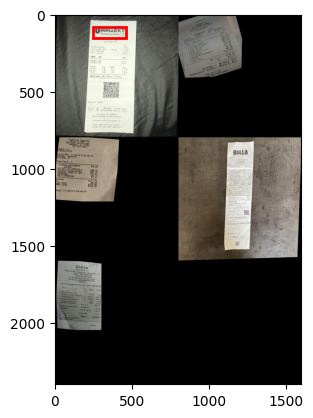

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_116.jpg


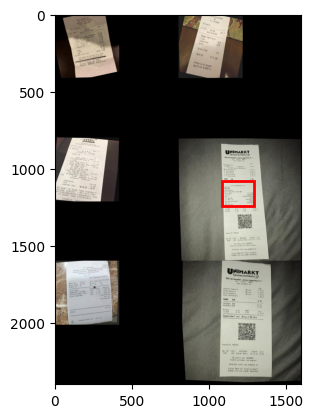

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_197.jpg


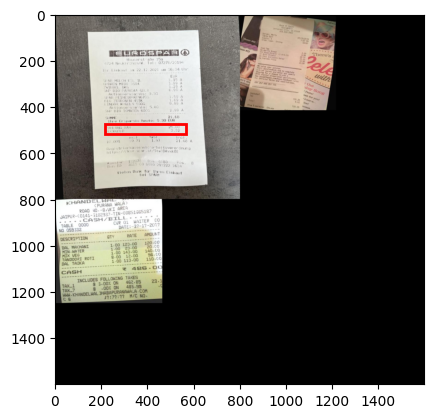

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_260.jpg


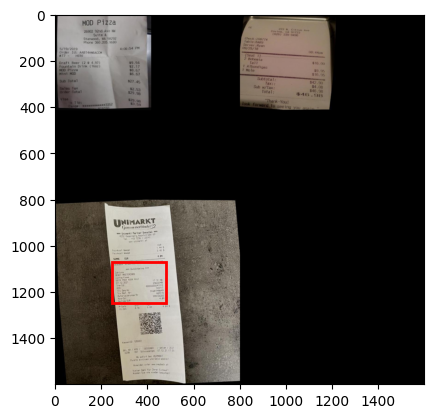

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_276.jpg


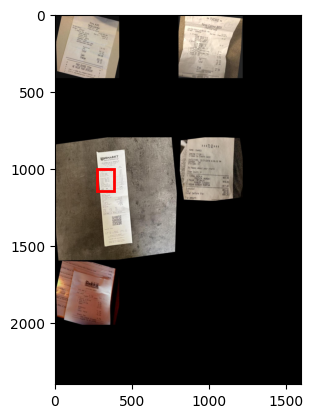

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_453.jpg


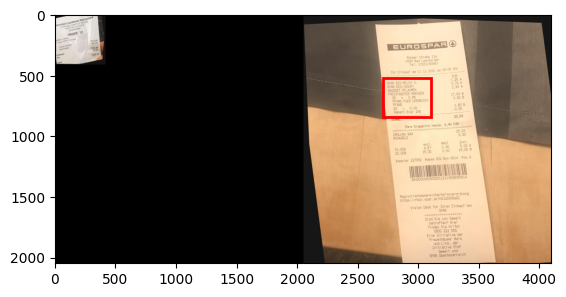

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_469.jpg


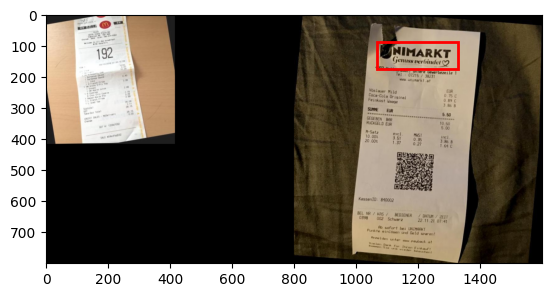

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_566.jpg


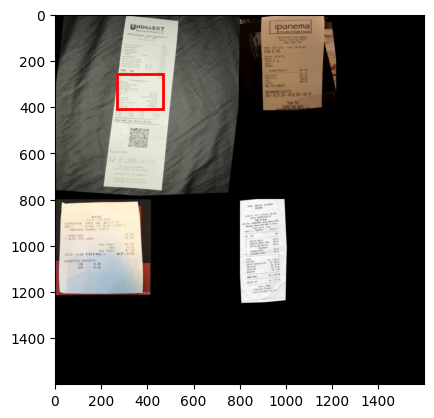

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_645.jpg


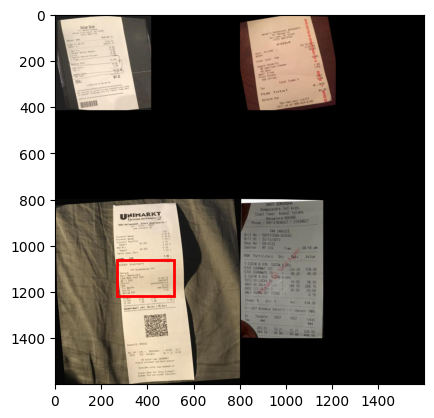

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_712.jpg


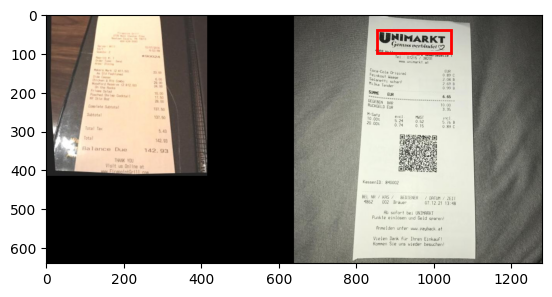

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_714.jpg


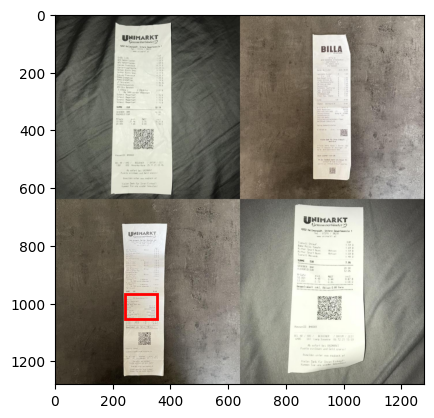

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_724.jpg


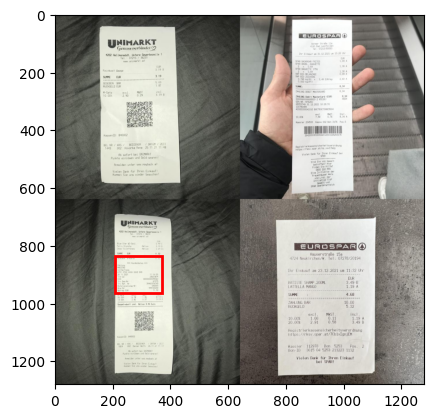

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_728.jpg


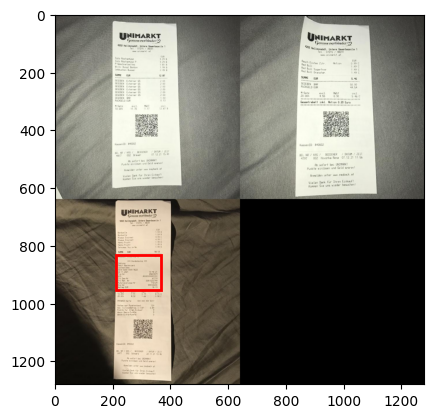

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_731.jpg


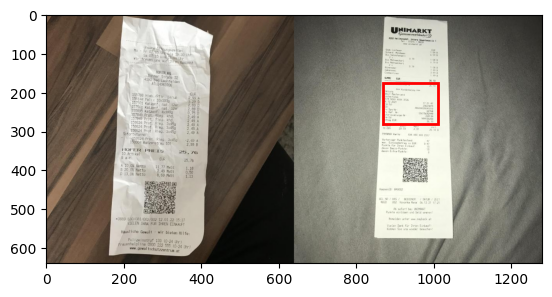

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_733.jpg


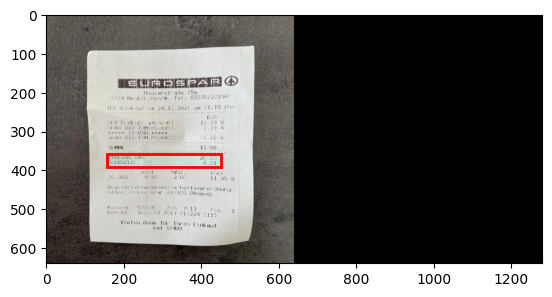

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_734.jpg


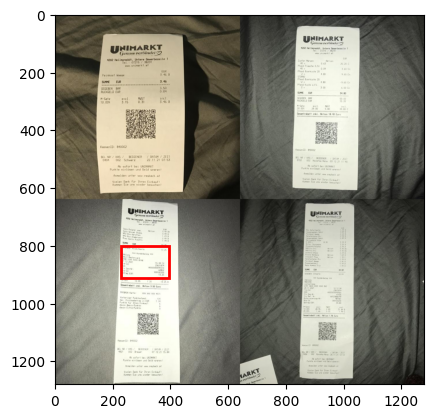

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_734.jpg


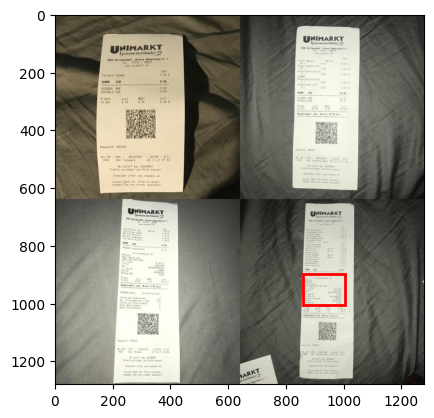

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_738.jpg


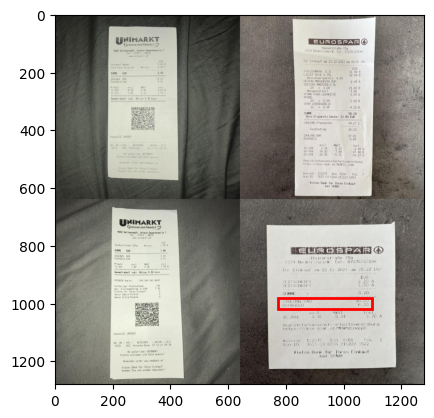

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_742.jpg


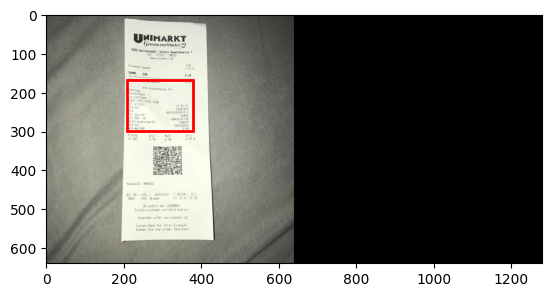

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_760.jpg


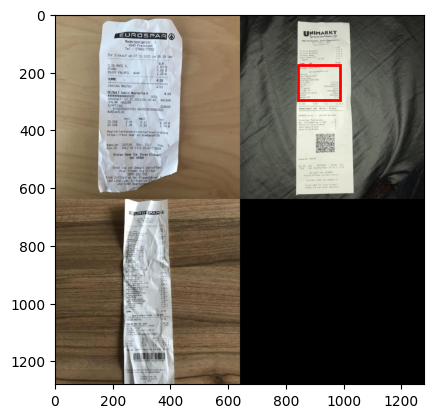

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_768.jpg


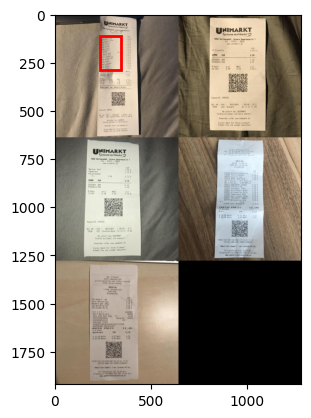

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_773.jpg


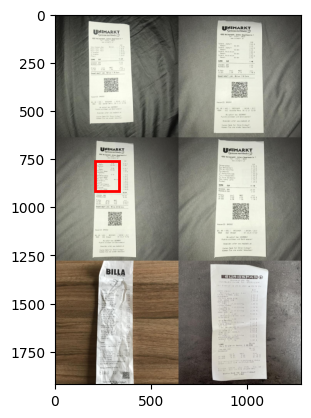

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_792.jpg


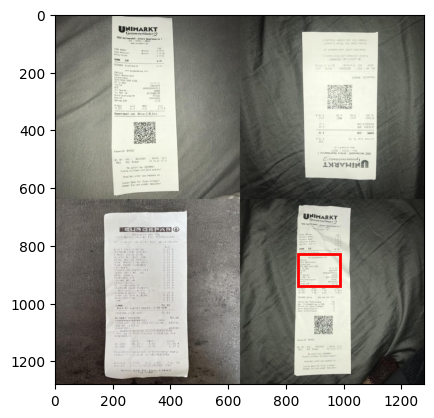

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_792.jpg


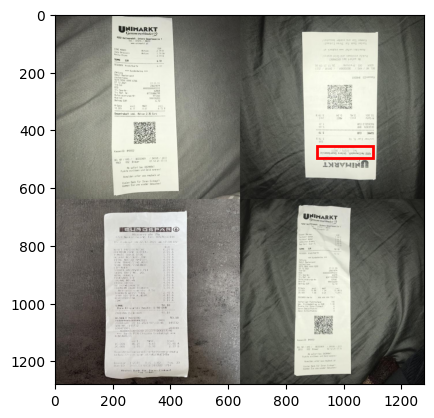

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_796.jpg


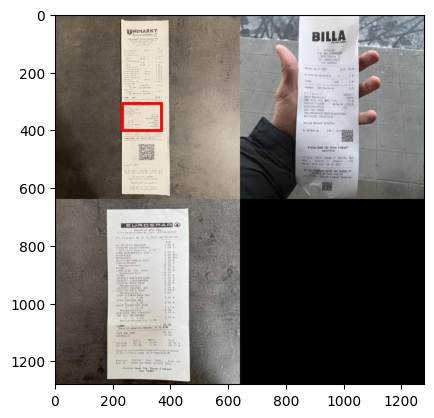

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_799.jpg


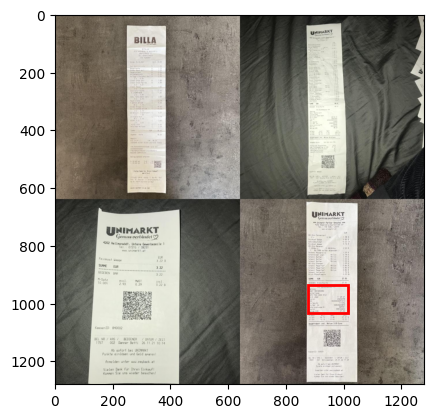

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_822.jpg


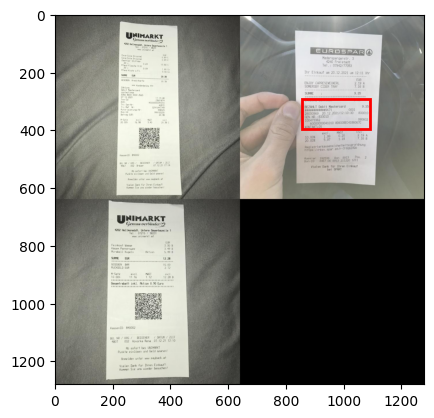

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_822.jpg


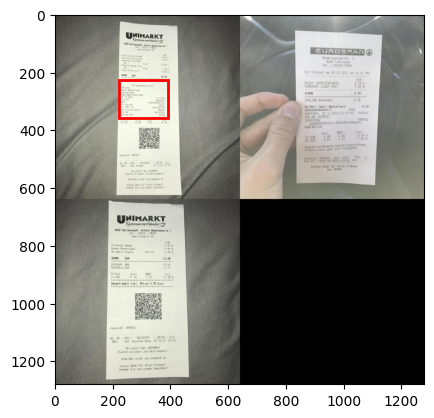

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_830.jpg


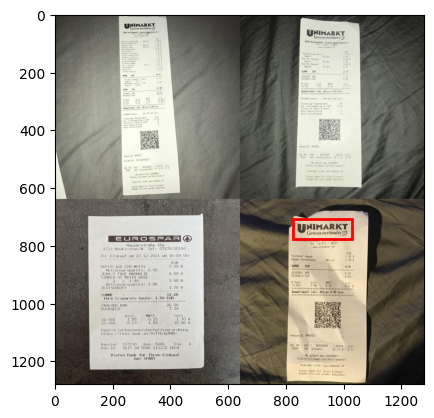

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_834.jpg


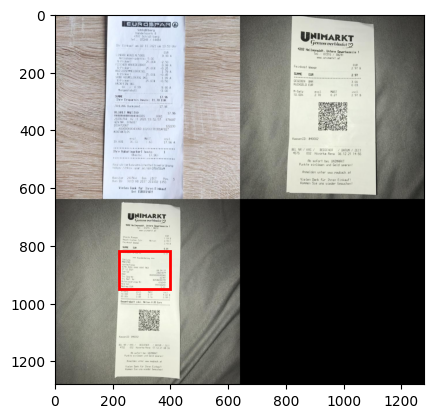

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_834.jpg


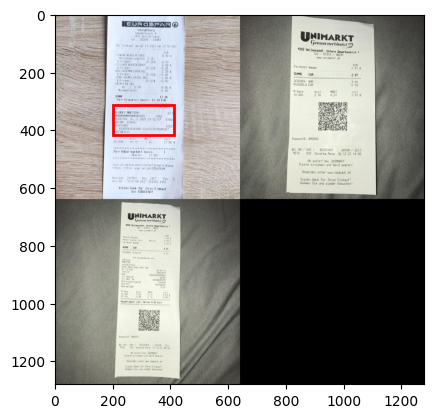

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_837.jpg


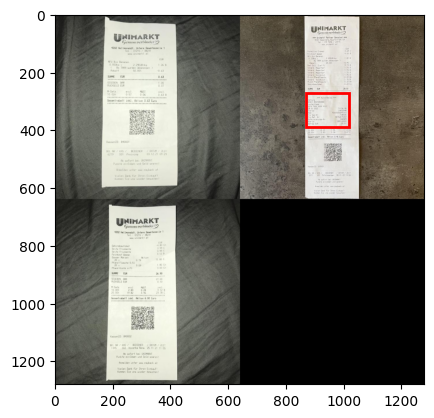

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_840.jpg


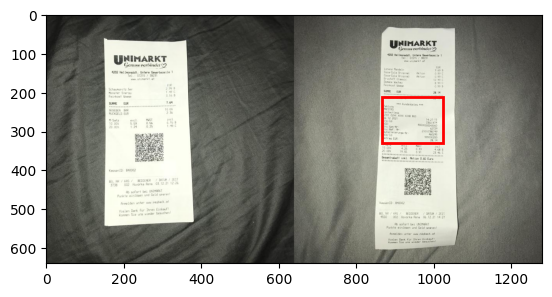

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_845.jpg


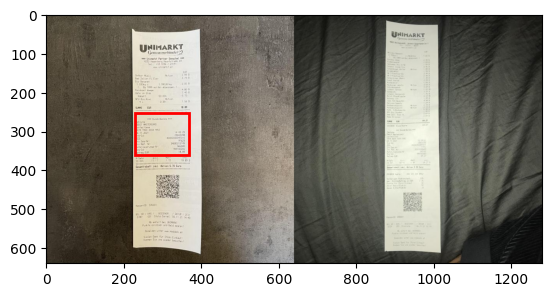

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_852.jpg


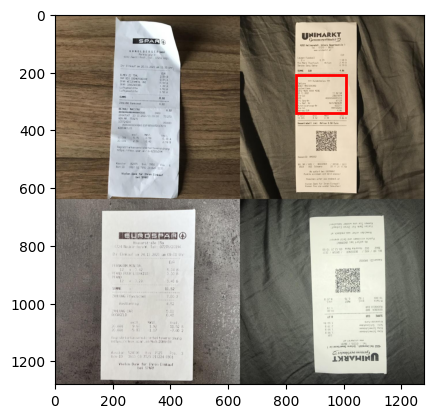

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_856.jpg


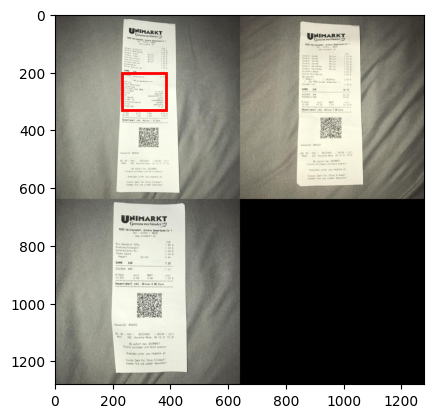

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_859.jpg


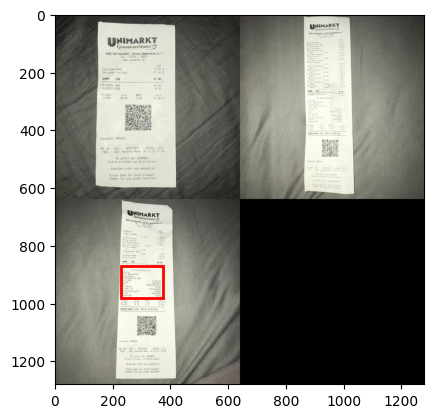

/content/drive/MyDrive/Combined Dataset2/valid/images/combined_859.jpg


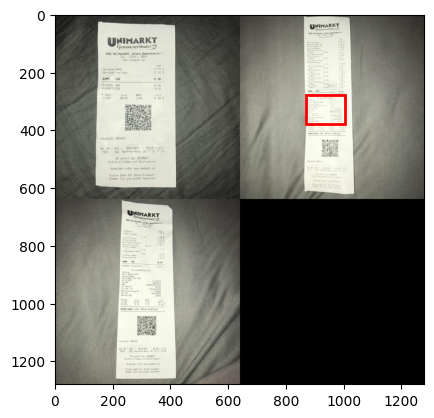

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Function to plot images with bounding boxes
def plot_images_with_bboxes(json_file_path):
    # Load the JSON data
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    for item in data:
        img_path = item['image']
        bbox = item['bbox']
        #img_name = os.path.basename(img_path)

        # Read the image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Create a plot
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max = bbox

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Set the title with the image name
        #ax.set_title(img_name)
        print(img_path)
        plt.show()

# Path to the JSON file
json_file_path = '/content/false_positives.json'

# Call the function to plot images with bounding boxes
plot_images_with_bboxes(json_file_path)
